# Web Scraping: American Economic Association (AEA) 2022 Openings for Economists (JOE) Non-Academic Positions Frequency Visualization

### Ethics
The script is designed to be efficient and lightweight, executing in minimal time. It's crafted to ensure it doesn't place any significant load on the target server, aligning with best practices for ethical web scraping.

### Intend 
This code is tailored to extract and visualize the frequency of the top 10 non-academic
positions from the 2022 JOE listings on the AEA website using web scraping techniques.
The extracted positions are then presented in a horizontal bar chart, allowing for
easy identification of the most sought-after non-academic roles in the listings.


### Note
Always ensure you have permission or the right to scrape any website. In this
case, the script is tailored for the AEA website. Always respect a website's `robots.txt`
file and terms of service.

### Usage
Execute the script, and it will fetch the relevant data from the AEA website, subsequently
displaying a bar chart highlighting the most frequent non-academic positions.

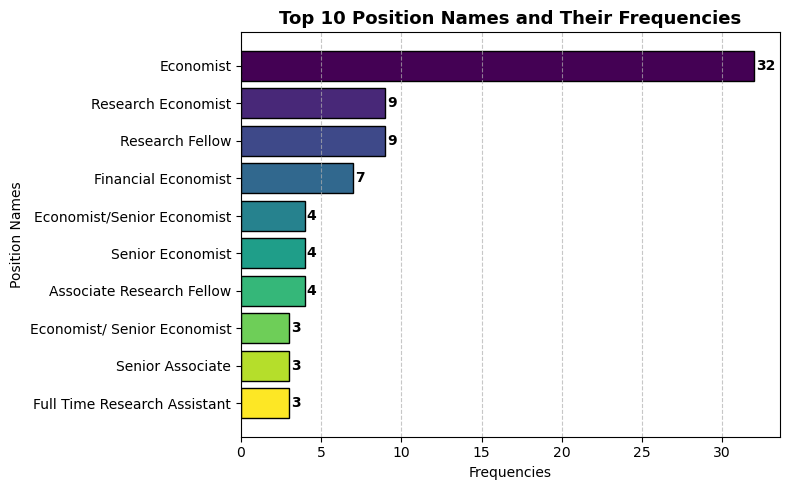

In [14]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


# Fetch the webpage
url = "https://www.aeaweb.org/joe/listings?q=eNplT0Fqw0AM_IvOLgRDe_ADAoH8oBSh7KrutorWSOsEE_L3qGmcS2_SzGg0c4F98VZ09G21IwwXKIqUWjkxDDqLdPDDy7laRmey9AUDQAfOIakKwzu8xvoGHx18s6xcJ8V9jnvoN33_sulDUa2MRUl2_5hUZ222oPF4d_xzcDpxxs8qmc1XMJHmkqkxejI6HuSZ0TixNqwqywrJoxdGdjY8BBHdAmvzb3Sk-C3TFCiJxDzR-LC7Xm_J-F8I"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract position names
positions = [link.text for link in soup.findAll('a', href=True) if "/joe/listing.php?JOE_ID=" in link.get('href')]

# Count the position occurrences
position_counter = Counter(positions)

# Get the top 10 most common positions
common_positions = position_counter.most_common(10)

# Check if there are any positions found
if common_positions:
    positions, counts = zip(*common_positions)
    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.barh(positions, counts, color=plt.cm.viridis(np.linspace(0, 1, len(counts))), edgecolor='black')
    plt.xlabel('Frequencies', fontsize=10)
    plt.ylabel('Position Names', fontsize=10)
    plt.title('Top 10 Position Names and Their Frequencies', fontsize=13, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for i, count in enumerate(counts):
        plt.text(count + 0.1, i, str(count), va='center', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No positions found!")
